# Final project

#### Qingwen Wang

This dataset reflects reported incidents of crime that occurred in the City of Chicago from 2014 to 2017, having 215108 obversations, 20 dimensions. Data is originally extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.<br>

Purpose is to build a multiple class classifier to predict the Primary Type of the crime given a relevant set of features. 

Feature description:<br>
ID​: Unique identifier for the record <br>
Case Number​: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident <br>
Block​: The partially redacted address where the incident occurred, placing it on the same block as the actual address <br>
IUCR​: The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type<br>
The list of IUCR codes at​​https://data.cityofchicago.org/d/c7ck-438e <br>
Primary Type​: The primary description of the IUCR code<br>
Description​: The secondary description of the IUCR code, a subcategory of the primary description.<br>
Location Description​: Description of the location where the incident occurred.<br>
Arrest​: Indicates whether an arrest was made<br>
Domestic​: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act<br>
Beat​: Indicates the beat where the incident occurred. A beat is the smallest police geographic area <br>
District​: Indicates the police district where the incident occurred <br>
Ward​: The ward (City Council district) where the incident occurred <br>
Community Area​: Indicates the community area where the incident occurred.
FBI Code​: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS) <br>
Latitude​: The latitude of the location where the incident occurred.<br>
Longitude​: The longitude of the location where the incident occurred. <br>

Data source: https://www.kaggle.com/chicago/chicago-crime

In [388]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Data Cleaning and Exploration 

In [310]:
crime = pd.read_csv('chicago_crimes.csv')
crime.shape

(215108, 20)

In [311]:
crime.tail()

,Unnamed: 0,Unnamed: 0.1,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year
215103,488255,2184883,10816200,JA116062,2017-01-14 16:01:00,031XX S MICHIGAN AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,GAS STATION,False,False,211,2.0,3.0,35.0,14,41.837872,-87.623435,2017
215104,488256,2139983,10747402,HZ508730,2016-11-09 12:45:00,004XX W OAKDALE AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,1934,19.0,44.0,6.0,24,41.935583,-87.640501,2016
215105,488258,1832966,10241578,HY429359,2015-09-19 02:30:00,0000X N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,112,1.0,42.0,32.0,06,41.882394,-87.627845,2015
215106,488262,1483931,9648594,HX299101,2014-06-11 13:44:00,049XX W VAN BUREN ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,1533,15.0,24.0,25.0,26,41.874940,-87.747873,2014
215107,488267,2273950,10953157,JA273267,2017-05-21 14:50:00,026XX S ST LOUIS AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1032,10.0,22.0,30.0,08B,41.843900,-87.712333,2017


<AxesSubplot:xlabel='count', ylabel='Primary Type'>

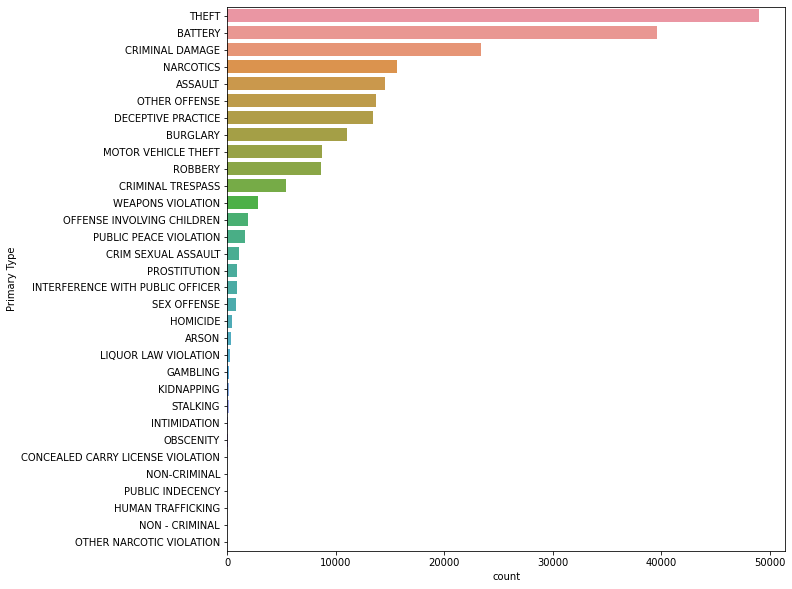

In [312]:
plt.figure(figsize=(10,10))
sns.countplot(y='Primary Type',data=crime, order=crime['Primary Type'].value_counts().index)


In [313]:
crime['Primary Type'].describe()

count     215108
unique        32
top        THEFT
freq       48958
Name: Primary Type, dtype: object

There are totally 32 unique crime types in our dataset; <br> 
We will focus on predict the top 8 crimes, of which number of obversations are larger than 10k per type of crime.

Create a new dataset by only remaining the top 8 crimes:

In [314]:
top8 = crime['Primary Type'].value_counts().index[0:8]
top8

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'DECEPTIVE PRACTICE', 'BURGLARY'],
      dtype='object')

In [315]:
col = top8.tolist()

In [316]:
crime = crime[crime['Primary Type'].isin(col)]
crime['Primary Type'].value_counts()

THEFT                 48958
BATTERY               39586
CRIMINAL DAMAGE       23390
NARCOTICS             15617
ASSAULT               14562
OTHER OFFENSE         13681
DECEPTIVE PRACTICE    13437
BURGLARY              11023
Name: Primary Type, dtype: int64

In [317]:
# remove duplicated data
crime.drop_duplicates(subset ="Case Number", keep = False, inplace = True) 
crime.shape

(180100, 20)

In [318]:
# check any missing value in the data
crime.isnull().sum()

Unnamed: 0                 0
Unnamed: 0.1               0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     450
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             0
FBI Code                   0
Latitude                6719
Longitude               6719
Year                       0
dtype: int64

Since our dataset is large enough, we can just remove them here.

In [319]:
crime = crime.dropna(subset=["Case Number", "Latitude", "Longitude"])

Just a double check data is still healthy here after deleting some observations.

In [320]:
crime['Primary Type'].value_counts()

THEFT                 47538
BATTERY               38800
CRIMINAL DAMAGE       22969
NARCOTICS             14380
ASSAULT               14258
OTHER OFFENSE         13111
DECEPTIVE PRACTICE    11617
BURGLARY              10708
Name: Primary Type, dtype: int64

In [321]:
# check no more missing value left
crime.isnull().any().any()

True

In [322]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173381 entries, 2 to 215107
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            173381 non-null  int64  
 1   Unnamed: 0.1          173381 non-null  int64  
 2   ID                    173381 non-null  int64  
 3   Case Number           173381 non-null  object 
 4   Date                  173381 non-null  object 
 5   Block                 173381 non-null  object 
 6   IUCR                  173381 non-null  object 
 7   Primary Type          173381 non-null  object 
 8   Description           173381 non-null  object 
 9   Location Description  173081 non-null  object 
 10  Arrest                173381 non-null  bool   
 11  Domestic              173381 non-null  bool   
 12  Beat                  173381 non-null  int64  
 13  District              173381 non-null  float64
 14  Ward                  173381 non-null  float64
 15  

Convert `Year`, `District`, `Ward`, `Community Area` ,etc... into categorical variables.

In [323]:
crime['Year'] = crime['Year'].astype('category')
crime['District'] = crime['District'].astype('category')
crime['Ward'] = crime['Ward'].astype('category')
crime['Community Area'] = crime['Community Area'].astype('category')
crime['Beat'] = crime['Beat'].astype('category')
crime['FBI Code'] = crime['FBI Code'].astype('category')
crime['Location Description'] = crime['Location Description'].astype('category')
crime['Primary Type'] = crime['Primary Type'].astype('category')

remove meaningless columns and reset index

In [324]:
crime = crime.drop(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Case Number'], 1)
crime.reset_index(drop=True)

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year
0,2016-04-12 01:30:00,023XX E 97TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,431,4.0,7.0,51.0,14,41.718685,-87.567615,2016
1,2014-06-22 12:00:00,059XX N CENTRAL PARK AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,1711,17.0,39.0,13.0,06,41.989245,-87.718835,2014
2,2015-07-14 19:30:00,003XX N CENTRAL PARK AVE,0810,THEFT,OVER $500,CTA PLATFORM,False,False,1123,11.0,28.0,27.0,06,41.886560,-87.716063,2015
3,2015-09-12 17:15:00,0000X N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,112,1.0,42.0,32.0,06,41.882394,-87.627845,2015
4,2017-08-18 13:30:00,043XX S CALIFORNIA AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,922,9.0,12.0,58.0,14,41.814668,-87.694399,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173376,2016-08-08 19:05:00,013XX N HUDSON AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,STREET,True,False,1821,18.0,27.0,8.0,18,41.907107,-87.639681,2016
173377,2017-01-14 16:01:00,031XX S MICHIGAN AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,GAS STATION,False,False,211,2.0,3.0,35.0,14,41.837872,-87.623435,2017
173378,2015-09-19 02:30:00,0000X N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,112,1.0,42.0,32.0,06,41.882394,-87.627845,2015
173379,2014-06-11 13:44:00,049XX W VAN BUREN ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,1533,15.0,24.0,25.0,26,41.874940,-87.747873,2014


In [325]:
# have a quick view on categorial variables
crime.describe(include=['O'])

,Date,Block,IUCR,Description
count,173381,173381,173381,173381
unique,124597,25697,175,164
top,2014-06-13 09:00:00,001XX N STATE ST,0820,SIMPLE
freq,12,616,19937,22152


From above table, we can find `THEFT` is the most crime type, `STREET` is the most crime location, `06` is the most FBI code, `2014` is the most crime year, `11` district, `42` ward, and `25` community area have high crime rate.

In [326]:
# have a quick view on continuous variables
crime.describe()

,Latitude,Longitude
count,173381.000000,173381.000000
mean,41.843595,-87.671632
std,0.093097,0.065321
min,36.619446,-91.686566
25%,41.768789,-87.714020
50%,41.863637,-87.665496
75%,41.906375,-87.627942
max,42.022537,-87.524529


From above table, we can find that standard deviation of `latitude` and `longitude` are near to zero, and there already contains some other location variables, so I will just remove these two. 
The values and deviation of `Beat` are quiet large, need to be scaled. 

### Feature engineering and Imputation

I want to figure out whether the time has close relationship with crime type,  
so here I replace `date` with another three features: `month`, `day_of_week` and `hour`.
But after do distribution plot to them, I find plot of `day_of_week` 

In [327]:
crime['Date'] = pd.to_datetime(crime['Date'])
crime['Day_of_week'] = crime['Date'].dt.weekday
crime['Month'] = crime['Date'].dt.month
crime['Hour'] = crime['Date'].dt.hour
crime = crime.drop(['Date','FBI Code'], 1)

In [328]:
crime.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude,Year,Day_of_week,Month,Hour
2,023XX E 97TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,431,4.0,7.0,51.0,41.718685,-87.567615,2016,1,4,1
4,059XX N CENTRAL PARK AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,1711,17.0,39.0,13.0,41.989245,-87.718835,2014,6,6,12
5,003XX N CENTRAL PARK AVE,0810,THEFT,OVER $500,CTA PLATFORM,False,False,1123,11.0,28.0,27.0,41.886560,-87.716063,2015,1,7,19
6,0000X N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,112,1.0,42.0,32.0,41.882394,-87.627845,2015,5,9,17
7,043XX S CALIFORNIA AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,922,9.0,12.0,58.0,41.814668,-87.694399,2017,4,8,13


In [329]:
pd.crosstab(crime['Month'], crime['Primary Type'])

Primary Type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,NARCOTICS,OTHER OFFENSE,THEFT
Month,,,,,,,,
1,931,2790,914,1700,978,1239,1124,3472
2,928,2496,688,1437,915,1225,980,3117
3,1158,3080,743,1781,1072,1410,1105,3440
4,1181,3203,756,1936,984,1289,1115,3645
5,1389,3783,821,2035,918,1342,1223,4040
6,1406,3693,832,1963,957,1211,1148,4245
7,1324,3837,1033,2188,954,1322,1174,4575
8,1323,3683,1022,2203,1047,1262,1147,4636
9,1284,3354,962,1970,986,1142,1007,4290


drop variables we dont need

In [330]:
crime = crime.drop(['Block', 'IUCR', 'Description','Location Description','Latitude','Longitude'], 1)

In [331]:
crime['Domestic'] = np.where(crime['Domestic']==True,1,0)

In [332]:
crime['Arrest'] = np.where(crime['Domestic']==True,1,0)

In [333]:
crime['Arrest'] = crime['Arrest'].astype('category')
crime['Domestic'] = crime['Domestic'].astype('category')
crime['Day_of_week'] = crime['Day_of_week'].astype('category')
crime['Month'] = crime['Month'].astype('category')
crime['Hour'] = crime['Hour'].astype('category')

In [334]:
crime.head()

,Primary Type,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Day_of_week,Month,Hour
2,CRIMINAL DAMAGE,1,1,431,4.0,7.0,51.0,2016,1,4,1
4,THEFT,0,0,1711,17.0,39.0,13.0,2014,6,6,12
5,THEFT,0,0,1123,11.0,28.0,27.0,2015,1,7,19
6,THEFT,0,0,112,1.0,42.0,32.0,2015,5,9,17
7,CRIMINAL DAMAGE,0,0,922,9.0,12.0,58.0,2017,4,8,13


Since data are imbalanced, here we use RandomUnderSampler to make it balanced.

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
X = crime.drop('Primary Type',axis = 1)
Y = crime['Primary Type']

Encoding categorical data:

In [337]:
X = pd.get_dummies(X)
X

,Arrest_0,Arrest_1,Domestic_0,Domestic_1,Beat_111,Beat_112,Beat_113,Beat_114,Beat_121,Beat_122,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215102,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
215103,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
215105,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215106,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

Downsample the data here, it can save time, since the dataset is big enough. <br>
However, it may also sacrifice the scores.

In [339]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [340]:
downsample = RandomUnderSampler()
Xs, Ys = downsample.fit_resample(X_train, Y_train)

In [341]:
Ys.value_counts()

ASSAULT               7563
BATTERY               7563
BURGLARY              7563
CRIMINAL DAMAGE       7563
DECEPTIVE PRACTICE    7563
NARCOTICS             7563
OTHER OFFENSE         7563
THEFT                 7563
Name: Primary Type, dtype: int64

In [342]:
for col in X_train.columns:
    print(col)

Arrest_0
Arrest_1
Domestic_0
Domestic_1
Beat_111
Beat_112
Beat_113
Beat_114
Beat_121
Beat_122
Beat_123
Beat_124
Beat_131
Beat_132
Beat_133
Beat_211
Beat_212
Beat_213
Beat_214
Beat_215
Beat_221
Beat_222
Beat_223
Beat_224
Beat_225
Beat_231
Beat_232
Beat_233
Beat_234
Beat_235
Beat_311
Beat_312
Beat_313
Beat_314
Beat_321
Beat_322
Beat_323
Beat_324
Beat_331
Beat_332
Beat_333
Beat_334
Beat_411
Beat_412
Beat_413
Beat_414
Beat_421
Beat_422
Beat_423
Beat_424
Beat_431
Beat_432
Beat_433
Beat_434
Beat_511
Beat_512
Beat_513
Beat_522
Beat_523
Beat_524
Beat_531
Beat_532
Beat_533
Beat_611
Beat_612
Beat_613
Beat_614
Beat_621
Beat_622
Beat_623
Beat_624
Beat_631
Beat_632
Beat_633
Beat_634
Beat_711
Beat_712
Beat_713
Beat_714
Beat_715
Beat_722
Beat_723
Beat_724
Beat_725
Beat_726
Beat_731
Beat_732
Beat_733
Beat_734
Beat_735
Beat_811
Beat_812
Beat_813
Beat_814
Beat_815
Beat_821
Beat_822
Beat_823
Beat_824
Beat_825
Beat_831
Beat_832
Beat_833
Beat_834
Beat_835
Beat_911
Beat_912
Beat_913
Beat_914
Beat_915
Beat_9

here we get a well balanced dataset.

## Random Forest

In [343]:
from tqdm import tqdm
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

split data into traing and test set

In [358]:
num_trees=[400,500,600,700,800,900,1000]
cvres=[]
for num in tqdm(num_trees):
    rf_cv_clf = RandomForestClassifier(n_estimators = num, max_features='sqrt',random_state=5)
    cvclf = cross_validate(rf_cv_clf, Xs, Ys, cv=5, scoring='f1_macro' )
    cvres.append(cvclf['test_score'].mean())

100%|██████████| 7/7 [1:33:56<00:00, 805.18s/it]


In [383]:
cvclf

{'fit_time': array([222.30278587, 213.97323322, 213.09592295, 215.91718411,
        218.09086704]),
 'score_time': array([5.40262508, 5.21157193, 5.32955599, 5.2307601 , 5.40586185]),
 'test_score': array([0.26830452, 0.27216854, 0.26351162, 0.2668709 , 0.26173577])}

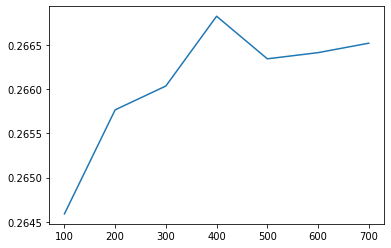

In [384]:
plt.plot(num_trees,cvres)

reach highest at 700.

In [376]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [362]:
rf = RandomForestClassifier(n_estimators =700, max_features='sqrt',random_state=5).fit(Xs,Ys)

In [363]:
print(classification_report(Y_test,rf.predict(X_test)))

                    precision    recall  f1-score   support

           ASSAULT       0.11      0.10      0.10      4225
           BATTERY       0.55      0.40      0.46     11530
          BURGLARY       0.13      0.29      0.18      3145
   CRIMINAL DAMAGE       0.21      0.17      0.19      6948
DECEPTIVE PRACTICE       0.15      0.34      0.21      3451
         NARCOTICS       0.29      0.56      0.38      4355
     OTHER OFFENSE       0.13      0.12      0.13      3874
             THEFT       0.49      0.24      0.32     14487

          accuracy                           0.28     52015
         macro avg       0.26      0.28      0.25     52015
      weighted avg       0.35      0.28      0.29     52015



Accurancy is 28%, just a little bit better than a navie guessing 12.5%.

### KNN

In [364]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

Since KNN is based on distance, so before build knn model, we need first to check the distrubution of variables.If large variance exists, they should be scaled before feed into model.<br>

In [371]:
cvres2=[]
n = [i for i in range(1,21)]
for i in tqdm(n):
    clf = KNeighborsClassifier(n_neighbors=i)
    nn = cross_validate(clf, X_train, Y_train, cv=5, scoring='f1_macro')
    cvres2.append(nn['test_score'].mean())

100%|██████████| 20/20 [1:24:33<00:00, 253.68s/it]


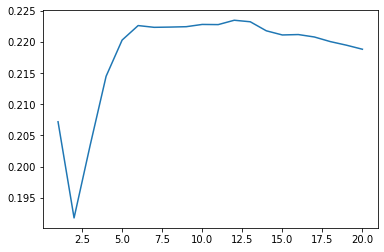

In [373]:
plt.plot([i for i in range(1,21)],cvres2)

cv suggests best neighbour is 12.

In [374]:
knn = KNeighborsClassifier(n_neighbors=12).fit(Xs,Ys)

In [375]:
print(classification_report(Y_test,knn.predict(X_test)))

                    precision    recall  f1-score   support

           ASSAULT       0.10      0.17      0.13      4225
           BATTERY       0.51      0.35      0.42     11530
          BURGLARY       0.11      0.29      0.16      3145
   CRIMINAL DAMAGE       0.18      0.13      0.15      6948
DECEPTIVE PRACTICE       0.13      0.27      0.18      3451
         NARCOTICS       0.29      0.50      0.36      4355
     OTHER OFFENSE       0.13      0.11      0.12      3874
             THEFT       0.50      0.20      0.29     14487

          accuracy                           0.25     52015
         macro avg       0.24      0.25      0.23     52015
      weighted avg       0.33      0.25      0.26     52015



### SGD

In [377]:
from sklearn.linear_model import SGDClassifier

In [378]:
def train_and_eval(loss, penalty):
    multi_clf = SGDClassifier(loss=loss, penalty=penalty, max_iter=10)
    multi_clf.fit(X_train, Y_train)
    test_pred = multi_clf.predict(X_test)
    train_pred = multi_clf.predict(X_train)
    print("Score with " + loss + " loss and "+ penalty + " regularization")
    print("Training Accuracy: ", accuracy_score(Y_train, train_pred))
    print("Test Accuracy: ", accuracy_score(Y_test, test_pred))
    return accuracy_score(Y_test, test_pred), multi_clf

Do Hyper parameter tuning on SGD Model, by using different loss methods, `log` and `hinge`;   
by setting different penalty, ` l1` and `l2`.  

In [379]:
best_score = 0.0
best_loss = None
best_penalty = None
best_model = None
for loss in ['log', 'hinge']:
    for penalty in ['l2', 'l1']:
        score, model = train_and_eval(loss, penalty)
        if score > best_score:
            best_score = score
            best_loss = loss
            best_penalty = penalty
            best_model = model   

/Users/qingwenwang/.venv3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Score with log loss and l2 regularization
Training Accuracy:  0.4044378161923438
Test Accuracy:  0.403537441122753


/Users/qingwenwang/.venv3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Score with log loss and l1 regularization
Training Accuracy:  0.4022213799581431
Test Accuracy:  0.4031529366528886


/Users/qingwenwang/.venv3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Score with hinge loss and l2 regularization
Training Accuracy:  0.3607517756208493
Test Accuracy:  0.3592233009708738


/Users/qingwenwang/.venv3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Score with hinge loss and l1 regularization
Training Accuracy:  0.34965311537003774
Test Accuracy:  0.3479380947803518


In [380]:
best_score

0.403537441122753

In [381]:
best_model

SGDClassifier(loss='log', max_iter=10)

To predict 8 kinds of crime type, 
Besides random forest and knn, I alsouse SGD model, because our dataset is quiet large, and SGD is good for a lagre labeled dataset(>100k), predicting a catergory. And the result shows that SGD is the best performance model for this question.<br>

My best model to do this is SGD log loss with L1 regularization, the average accurancy is 40%, which is better than a naive one (12.5% accurancy). <br> 
The result is not a good score, but still can predict something here. And the performance of SGD is a little bit above my expectation, since it takes only a short while to run, but gives out the best result. <br>

To further improve my model, 
I will probably both try some other methods to see if there will a better one, such as "kernel approximation".
or have a deeper data analysis to dig out some other features; <br>
for example, download the chicago map, and mapping `latitidu` and `longtitude` into real map, to find out high potential area in chicago; and check if I could combine out some bi-variate features.<br>

The insight is that theft is the most frequency type of crime, so the government can increase fines to deter theft;  there is a higher occurance in the summer, so a new question comes to me is that if I can get the dataset of daily temperature in chicago, so that i can better predict the crime maybe. <br>